# Code

In [124]:
library(magrittr)
hospitals = read.csv("hospital-data.csv")
outcomes = read.csv("outcome-of-care-measures.csv", colClasses="character", na.strings="Not Available")

In [125]:
dim(outcomes)
colnames(outcomes) %>% as.matrix

[1] 4706   46

Provider.Number
Hospital.Name
Address.1
Address.2
Address.3
City
State
ZIP.Code
County.Name
Phone.Number
Hospital.30.Day.Death..Mortality..Rates.from.Heart.Attack


In [126]:
colnames(outcomes)[11]
colnames(outcomes)[17]
colnames(outcomes)[23]

[1] "Hospital.30.Day.Death..Mortality..Rates.from.Heart.Attack"

[1] "Hospital.30.Day.Death..Mortality..Rates.from.Heart.Failure"

[1] "Hospital.30.Day.Death..Mortality..Rates.from.Pneumonia"

In [183]:
read_and_format = function(filename){
    outcomes = read.csv(filename, colClasses="character", na.strings="Not Available")

    outcome_red = outcomes[,c(2,7,11,17,23)]
    colnames(outcome_red) = c("name", "state", "heart attack", "heart failure", "pneumonia")
    outcome_red[,"state"] = as.factor(outcome_red[,"state"])
    for ( i in 3:5 ){
        outcome_red[,i] = as.numeric(outcome_red[,i])
    }
    
    outcome_red
}
data = read_and_format("outcome-of-care-measures.csv")
data %>% head
data[1,] %>% sapply(., class)

,name,state,heart attack,heart failure,pneumonia
1,SOUTHEAST ALABAMA MEDICAL CENTER,AL,14.3,11.4,10.9
2,MARSHALL MEDICAL CENTER SOUTH,AL,18.5,15.2,13.9
3,ELIZA COFFEE MEMORIAL HOSPITAL,AL,18.1,11.3,13.4
4,MIZELL MEMORIAL HOSPITAL,AL,NA,13.6,14.9
5,CRENSHAW COMMUNITY HOSPITAL,AL,NA,13.8,15.8
6,MARSHALL MEDICAL CENTER NORTH,AL,NA,12.5,8.7


name         state  heart attack heart failure     pneumonia 
  "character"      "factor"     "numeric"     "numeric"     "numeric"

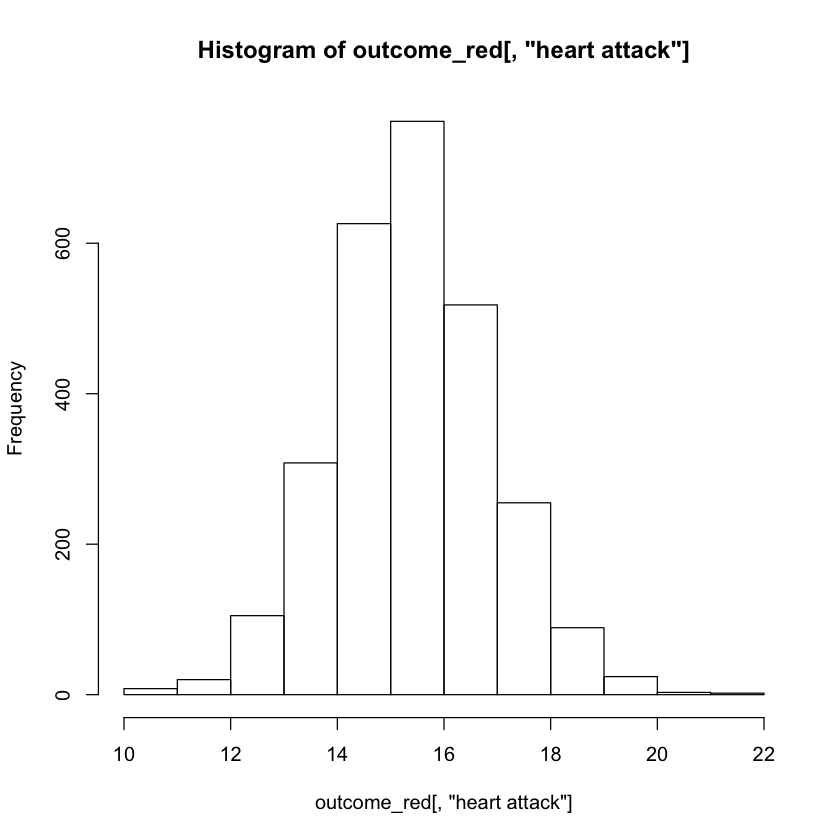

In [128]:
hist(outcome_red[,"heart attack"])

In [184]:
outcome_red[order(outcome_red[,"name"]),] %>% head

,name,state,heart attack,heart failure,pneumonia
3726,ABBEVILLE AREA MEDICAL CENTER,SC,NA,11,11.3
1735,ABBEVILLE GENERAL HOSPITAL,LA,NA,15.7,12
2137,ABBOTT NORTHWESTERN HOSPITAL,MN,12.3,9.2,9.2
4045,ABILENE REGIONAL MEDICAL CENTER,TX,17.2,13.6,15
3561,ABINGTON MEMORIAL HOSPITAL,PA,14.3,9.6,11.2
1241,ABRAHAM LINCOLN MEMORIAL HOSPITAL,IL,NA,11.8,9.8


In [285]:
state = "IL"
outcome = "pneumonia"
mortality = split(data, data[,"state"])[[state]]
mortality = mortality[order(mortality[,"name"]),]
mortality = mortality[order(mortality[,outcome]),]
mortality %>% tail
mortality = mortality[!is.na(mortality[,outcome]),]
mortality %>% tail

# mortality %>% tail
# mortality %>% nrow
# mortality[800:831,]

,name,state,heart attack,heart failure,pneumonia
1254,PERRY MEMORIAL HOSPITAL,IL,14.8,13.7,16.9
1116,ST JOHNS HOSPITAL,IL,13.7,13.2,17.1
1225,MIDWEST MEDICAL CENTER,IL,NA,NA,NA
1138,MIDWESTERN REGION MED CENTER,IL,NA,NA,NA
1163,SACRED HEART HOSPITAL,IL,NA,7.6,NA
1105,VISTA MEDICAL CENTER WEST,IL,NA,NA,NA


,name,state,heart attack,heart failure,pneumonia
1243,KEWANEE HOSPITAL,IL,NA,13.2,15.9
1242,FERRELL HOSPITAL COMMUNITY FOUNDATIONS,IL,NA,13.5,16.1
1267,ST FRANCIS HOSPITAL,IL,16.5,14.7,16.2
1118,PASSAVANT AREA HOSPITAL,IL,17.4,12.4,16.3
1254,PERRY MEMORIAL HOSPITAL,IL,14.8,13.7,16.9
1116,ST JOHNS HOSPITAL,IL,13.7,13.2,17.1


In [324]:
data = read_and_format("outcome-of-care-measures.csv")

rankhospital = function(state, outcome, rank){
    if ( !state %in% levels(data[,"state"]) ) stop("invalid state")
    if ( !outcome %in% c("heart attack", "heart failure", "pneumonia") ) stop("invalid outcome")
    mortality = split(data, data[,"state"])[[state]]
    mortality = mortality[order(mortality[,"name"]),]
    mortality = mortality[order(mortality[,outcome]),]
    mortality = mortality[!is.na(mortality[,outcome]),]
    if ( rank == "best" ) rank=1
    if ( rank == "worst" ) rank=nrow(mortality)
    mortality[rank,"name"]
}

best = function(state, outcome){
    rankhospital(state, outcome, 1)
}
        
rankall = function(outcome, num="best"){
    states = levels(data[,"state"])
    out = matrix(nrow=length(states), ncol=2)
    colnames(out) = c("hospital", "state")
    rownames(out) = states
    for ( i in 1:length(states) ){
        out[i,] = c(rankhospital(states[i], outcome, num), states[i])
    }
    as.data.frame(out)
}

In [301]:
# test that alphabetical preordering works

test_data = data.frame(cbind(name=c("b", "a", "c", "d"), state=c("IL", "IL", "AX", "AX"), pneumonia=c(1,1,2,2)))
data_o = data
data = test_data

best("IL", "pneumonia")

data = data_o

[1] a
Levels: a b c d

# Tests

### best()

In [288]:
best("TX", "heart attack")

[1] "CYPRESS FAIRBANKS MEDICAL CENTER"

In [289]:
best("TX", "heart failure")

[1] "FORT DUNCAN MEDICAL CENTER"

In [290]:
best("MD", "heart attack")

[1] "JOHNS HOPKINS HOSPITAL, THE"

In [291]:
best("MD", "pneumonia")

[1] "GREATER BALTIMORE MEDICAL CENTER"

In [292]:
best("BB", "heart attack")

ERROR: Error in rankhospital(state, outcome, 1): invalid state


In [293]:
best("NY", "hert attack")

ERROR: Error in rankhospital(state, outcome, 1): invalid outcome


### rankhospital()

In [295]:
sapply(1:6, function(i) rankhospital("TX", "heart failure", i)) %>% as.matrix

FORT DUNCAN MEDICAL CENTER
TOMBALL REGIONAL MEDICAL CENTER
CYPRESS FAIRBANKS MEDICAL CENTER
DETAR HOSPITAL NAVARRO
"METHODIST HOSPITAL,THE"
MISSION REGIONAL MEDICAL CENTER


In [294]:
rankhospital("TX", "heart failure", 4)

[1] "DETAR HOSPITAL NAVARRO"

In [296]:
rankhospital("MD", "heart attack", "worst")

[1] "HARFORD MEMORIAL HOSPITAL"

In [297]:
rankhospital("MN", "heart attack", 5000)

[1] NA

### rankall()

In [320]:
head(rankall("heart attack", 20), 10)

,hospital,state
AK,NA,AK
AL,D W MCMILLAN MEMORIAL HOSPITAL,AL
AR,ARKANSAS METHODIST MEDICAL CENTER,AR
AZ,JOHN C LINCOLN DEER VALLEY HOSPITAL,AZ
CA,SHERMAN OAKS HOSPITAL,CA
CO,SKY RIDGE MEDICAL CENTER,CO
CT,MIDSTATE MEDICAL CENTER,CT
DC,NA,DC
DE,NA,DE
FL,SOUTH FLORIDA BAPTIST HOSPITAL,FL


In [322]:
tail(rankall("pneumonia", "worst"), 3)

,hospital,state
WI,"MAYO CLINIC HEALTH SYSTEM - NORTHLAND, INC",WI
WV,PLATEAU MEDICAL CENTER,WV
WY,NORTH BIG HORN HOSPITAL DISTRICT,WY


In [325]:
tail(rankall("heart failure"), 10)

,hospital,state
TN,WELLMONT HAWKINS COUNTY MEMORIAL HOSPITAL,TN
TX,FORT DUNCAN MEDICAL CENTER,TX
UT,VA SALT LAKE CITY HEALTHCARE - GEORGE E. WAHLEN VA MEDICAL CENTER,UT
VA,SENTARA POTOMAC HOSPITAL,VA
VI,GOV JUAN F LUIS HOSPITAL & MEDICAL CTR,VI
VT,SPRINGFIELD HOSPITAL,VT
WA,HARBORVIEW MEDICAL CENTER,WA
WI,AURORA ST LUKES MEDICAL CENTER,WI
WV,FAIRMONT GENERAL HOSPITAL,WV
WY,CHEYENNE VA MEDICAL CENTER,WY
